<a href="https://www.kaggle.com/code/prasadposture121/covid-19-data-analysis?scriptVersionId=122391426" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Prasad Rajesh Posture  
#### **Batch:** June 2022  
#### **Data Analytics with Python**
#### **Task :** Peform data analysis on India's statewise covid-19 data using various visualization tools.

# Importing Libraries and Loading the Data

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

#### Loading the data

Datasource : https://www.kaggle.com/datasets/prasadposture121/covid19-india-statewise-data

In [2]:
data= pd.read_csv('../input/covid19-india-statewise-data/Covid-19_India.csv')
data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10039,0,9910,129,0.00,98.72,1.28,380581
1,Andhra Pradesh,2319869,62,2305076,14731,0.00,99.36,0.63,49577103
2,Arunachal Pradesh,64504,1,64207,296,0.00,99.54,0.46,1383727
3,Assam,724225,4,716235,7986,0.00,98.90,1.10,31205576
4,Bihar,830702,43,818403,12256,0.01,98.52,1.48,104099452


#### Renaming the data columns

In [3]:
data.rename(columns = {'Active Ratio':'Active Ratio (%)', 'Discharge Ratio': 'Discharge Ratio (%)', 'Death Ratio': 'Death Ratio (%)'}, inplace = True)

#### Percentage of Population Infected by COVID

In [4]:
data['Affected Ratio %'] = data['Total Cases']/data['Population']
data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%),Population,Affected Ratio %
0,Andaman and Nicobar,10039,0,9910,129,0.00,98.72,1.28,380581,0.026378
1,Andhra Pradesh,2319869,62,2305076,14731,0.00,99.36,0.63,49577103,0.046793
2,Arunachal Pradesh,64504,1,64207,296,0.00,99.54,0.46,1383727,0.046616
3,Assam,724225,4,716235,7986,0.00,98.90,1.10,31205576,0.023208
4,Bihar,830702,43,818403,12256,0.01,98.52,1.48,104099452,0.007980


# Exploratory Data Analysis

#### Columns of the data

In [5]:
data.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)',
       'Population', 'Affected Ratio %'],
      dtype='object')

#### Checking fot the null values

In [6]:
data.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
Population             0
Affected Ratio %       0
dtype: int64

No null values that's a good sign.

#### Checking for the duplicate values

In [7]:
data.duplicated().sum()

0

#### Shape of the dataset (rows, columns)

In [8]:
data.shape

(36, 10)

#### Size of the dataset


In [9]:
data.size

360

#### Basic Information of the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
 8   Population           36 non-null     int64  
 9   Affected Ratio %     36 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.9+ KB


#### Stastical information of each column

In [11]:
data.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%),Population,Affected Ratio %
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.000000
mean,1.198233e+06,415.416667,1.183250e+06,14567.027778,0.026389,98.845000,1.128056,3.362689e+07,0.058894
std,1.771219e+06,797.343424,1.745163e+06,26960.635812,0.033050,0.494221,0.491440,4.305758e+07,0.054572
min,1.003900e+04,0.000000,9.910000e+03,4.000000,0.000000,97.650000,0.030000,6.447300e+04,0.007980
25%,9.912050e+04,4.000000,9.802975e+04,1104.500000,0.000000,98.520000,0.870000,1.439840e+06,0.022518
50%,5.892080e+05,69.000000,5.828095e+05,6505.500000,0.010000,98.860000,1.100000,2.106970e+07,0.040496
75%,1.285924e+06,385.250000,1.276082e+06,14208.250000,0.040000,99.112500,1.397500,5.229275e+07,0.066031
max,7.882476e+06,3799.000000,7.732792e+06,147856.000000,0.120000,99.970000,2.340000,1.998123e+08,0.207915


#### See if there is any correlation between any data columns

Numeric Correlations

In [12]:
data.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%),Population,Affected Ratio %
Total Cases,1.000000,0.793212,0.999987,0.943813,0.164050,-0.135375,0.125179,0.533583,0.166193
Active,0.793212,1.000000,0.794030,0.684131,0.535411,-0.121842,0.086232,0.277804,0.355733
Discharged,0.999987,0.794030,1.000000,0.942144,0.164359,-0.133217,0.122980,0.533843,0.166458
Deaths,0.943813,0.684131,0.942144,1.000000,0.122715,-0.266886,0.260741,0.490676,0.132934
Active Ratio (%),0.164050,0.535411,0.164359,0.122715,1.000000,-0.147545,0.079946,0.040004,0.260475
Discharge Ratio (%),-0.135375,-0.121842,-0.133217,-0.266886,-0.147545,1.000000,-0.997654,-0.058038,0.144921
Death Ratio (%),0.125179,0.086232,0.122980,0.260741,0.079946,-0.997654,1.000000,0.057243,-0.164403
Population,0.533583,0.277804,0.533843,0.490676,0.040004,-0.058038,0.057243,1.000000,-0.342401
Affected Ratio %,0.166193,0.355733,0.166458,0.132934,0.260475,0.144921,-0.164403,-0.342401,1.000000


Corrrelation using Heatmap

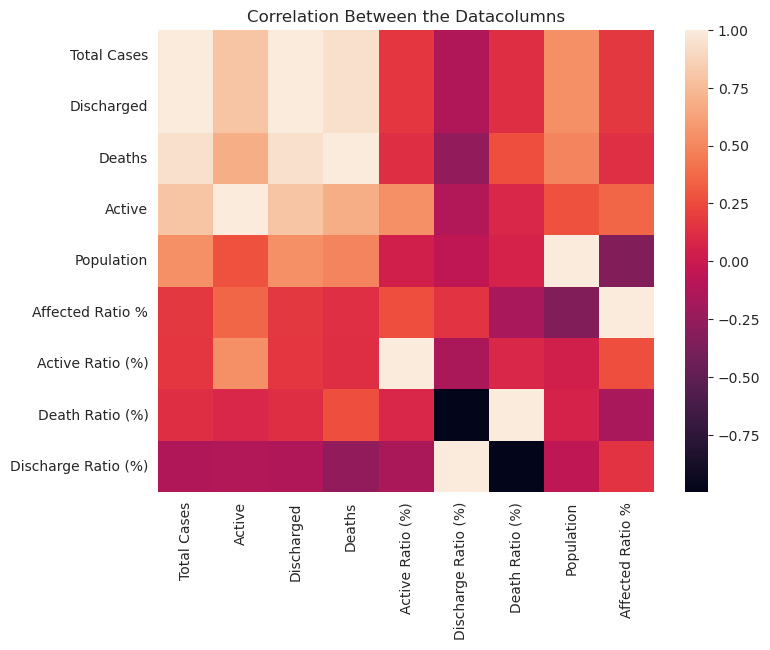

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr().sort_values(by='Total Cases', ascending=False))
plt.title("Correlation Between the Datacolumns");

Correlation using Scatter Matrix

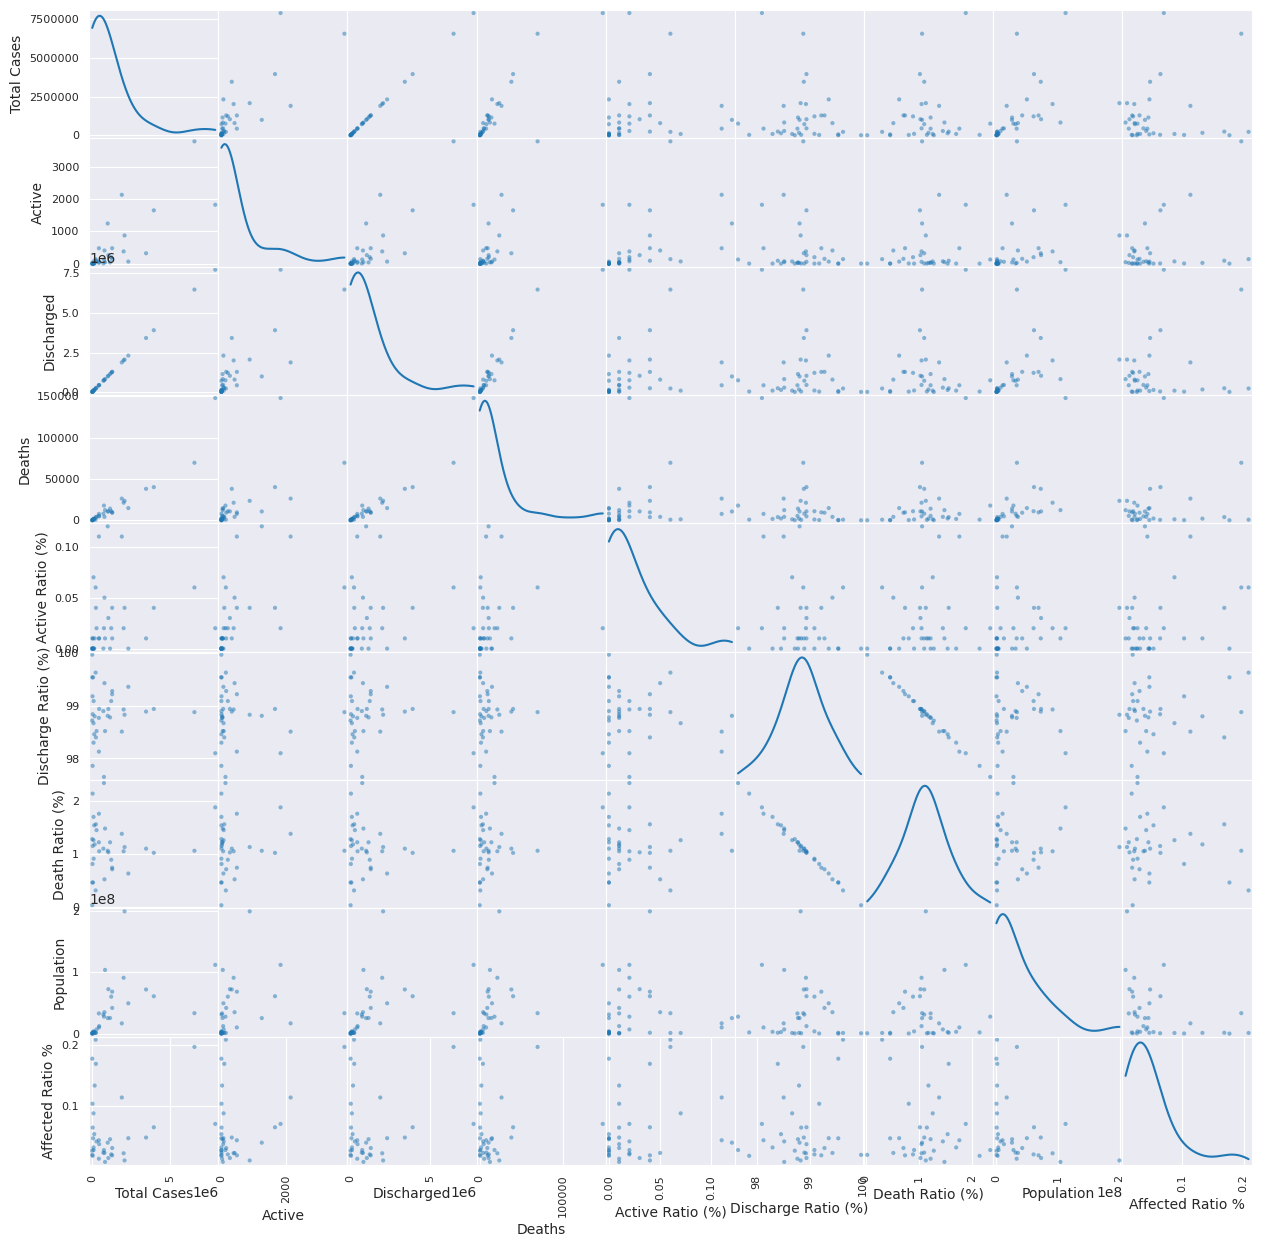

In [14]:
scatter_matrix(data,figsize=[15,15],diagonal='kde')
plt.show();

<p style="background-color:#7ff2f3;">
    <b>
        Conclusion:
    </b>
    It is evident from these plots and the numerical data of correlation that the total
    number cases and number of discharged people show high positive correlation therefore
    lot of people are getting recovered from this disease. This is also supported by the
    negative correlation between death ratio and discharge ratio. Although there is a
    significant amount of correlation between number deaths and total cases it is because
    of the exponetial spread of the virus.
</p>

### Data Visualization

#### Comparing each attribute of the dataset such as total number of cases, number of active cases, deaths etc with different states / union territories.

In [15]:
#Getting the different attributes of the dataset
attributes=list(data.columns)
attributes.remove('State/UTs')
attributes

['Total Cases',
 'Active',
 'Discharged',
 'Deaths',
 'Active Ratio (%)',
 'Discharge Ratio (%)',
 'Death Ratio (%)',
 'Population',
 'Affected Ratio %']

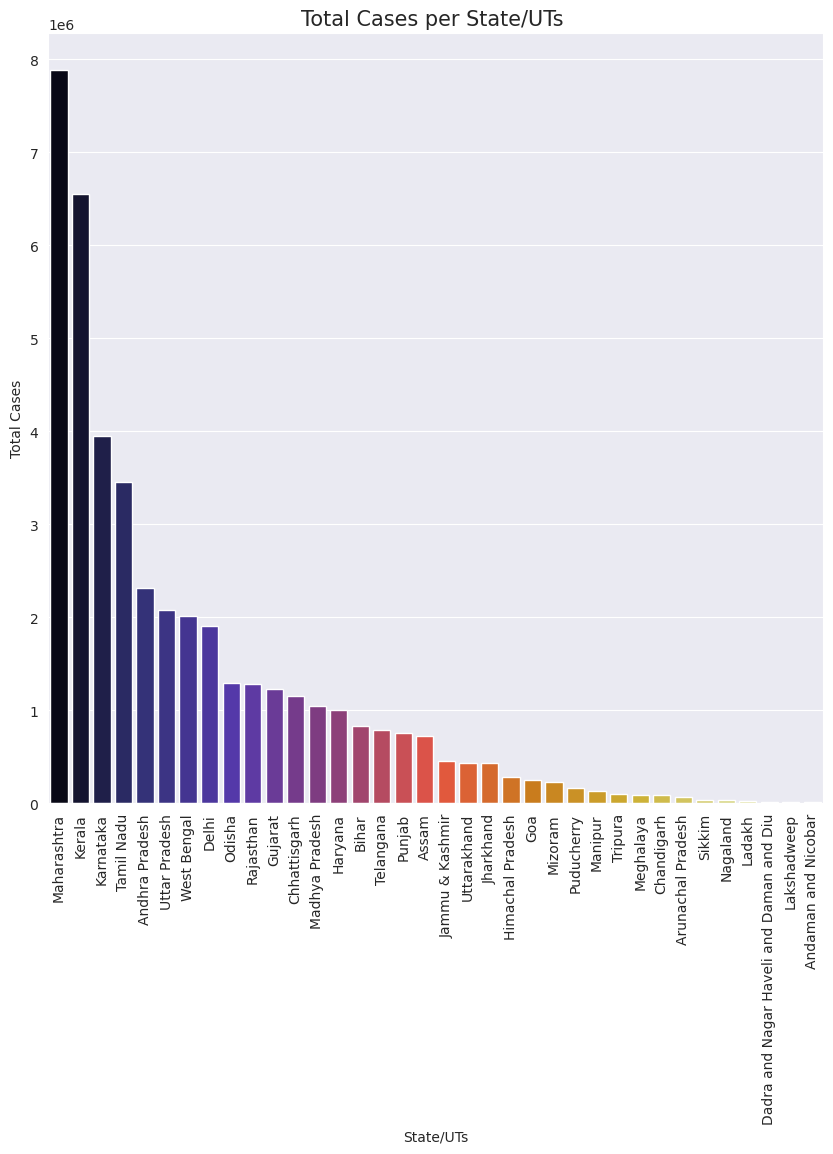

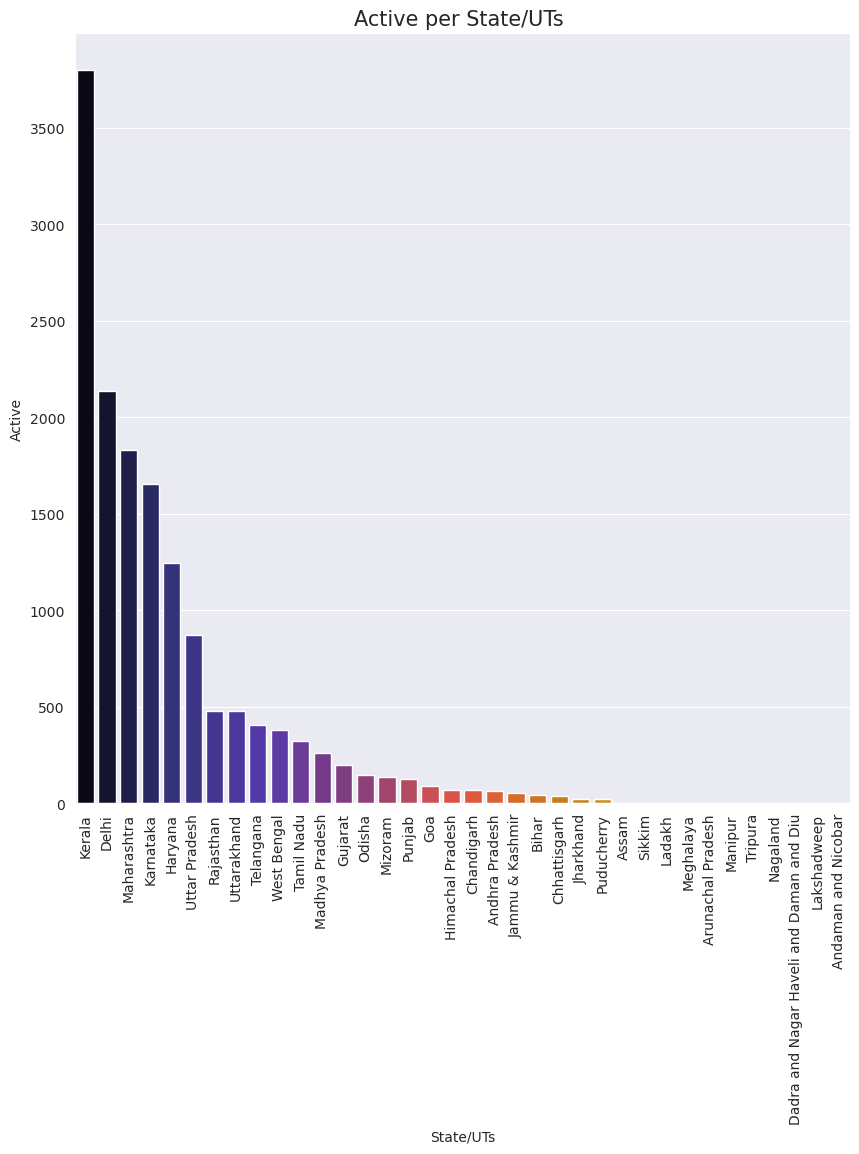

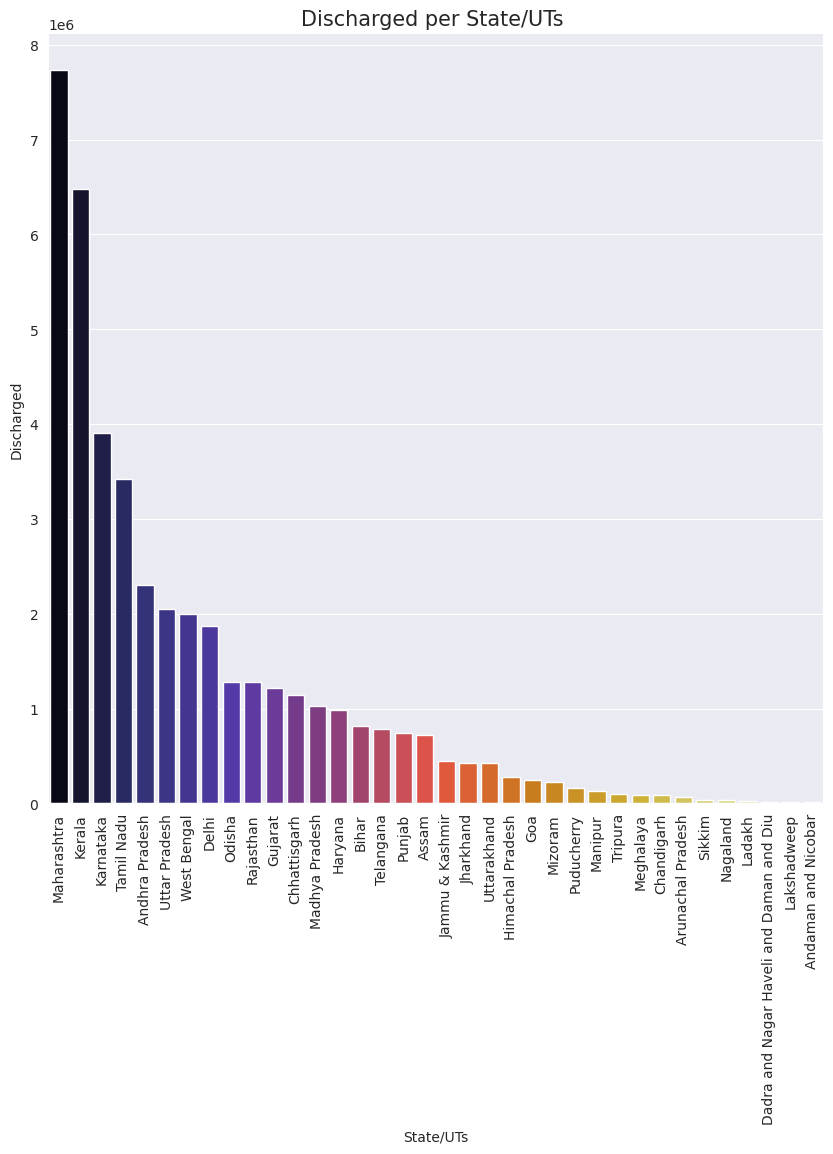

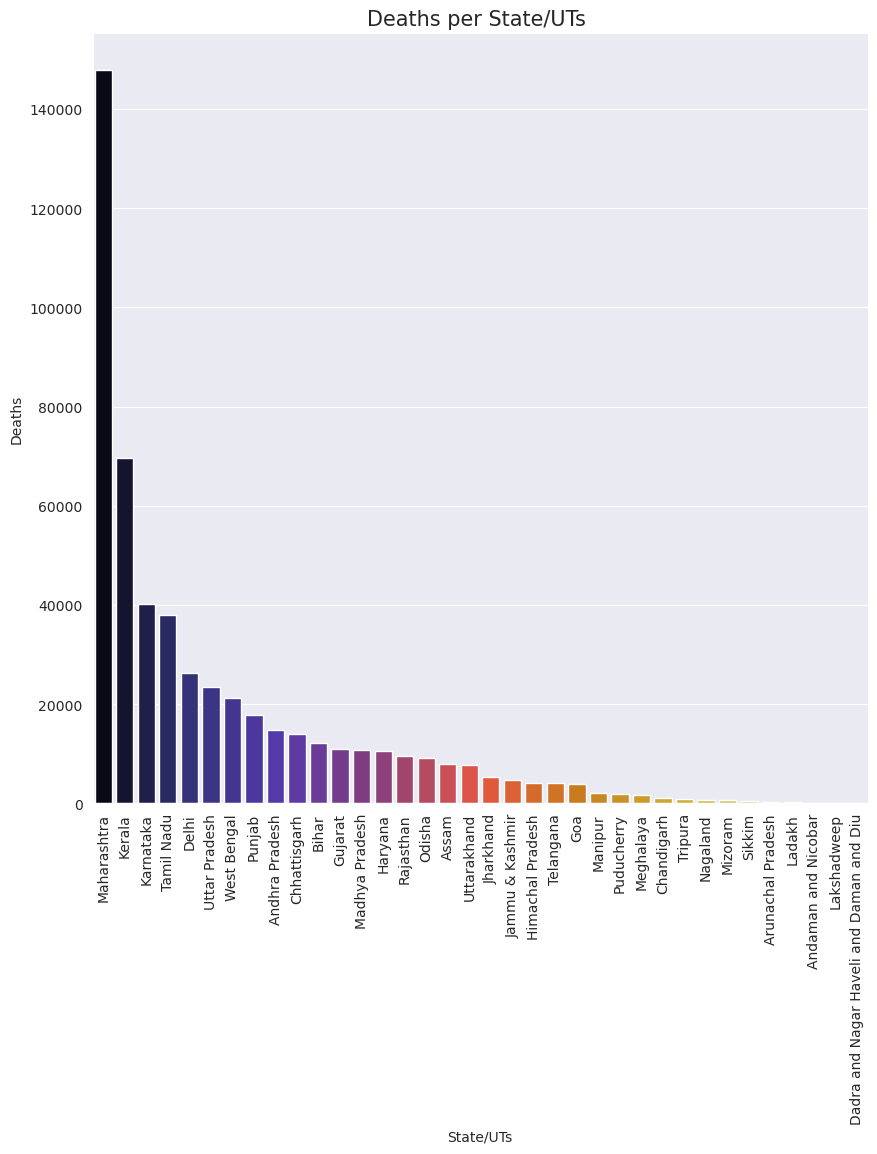

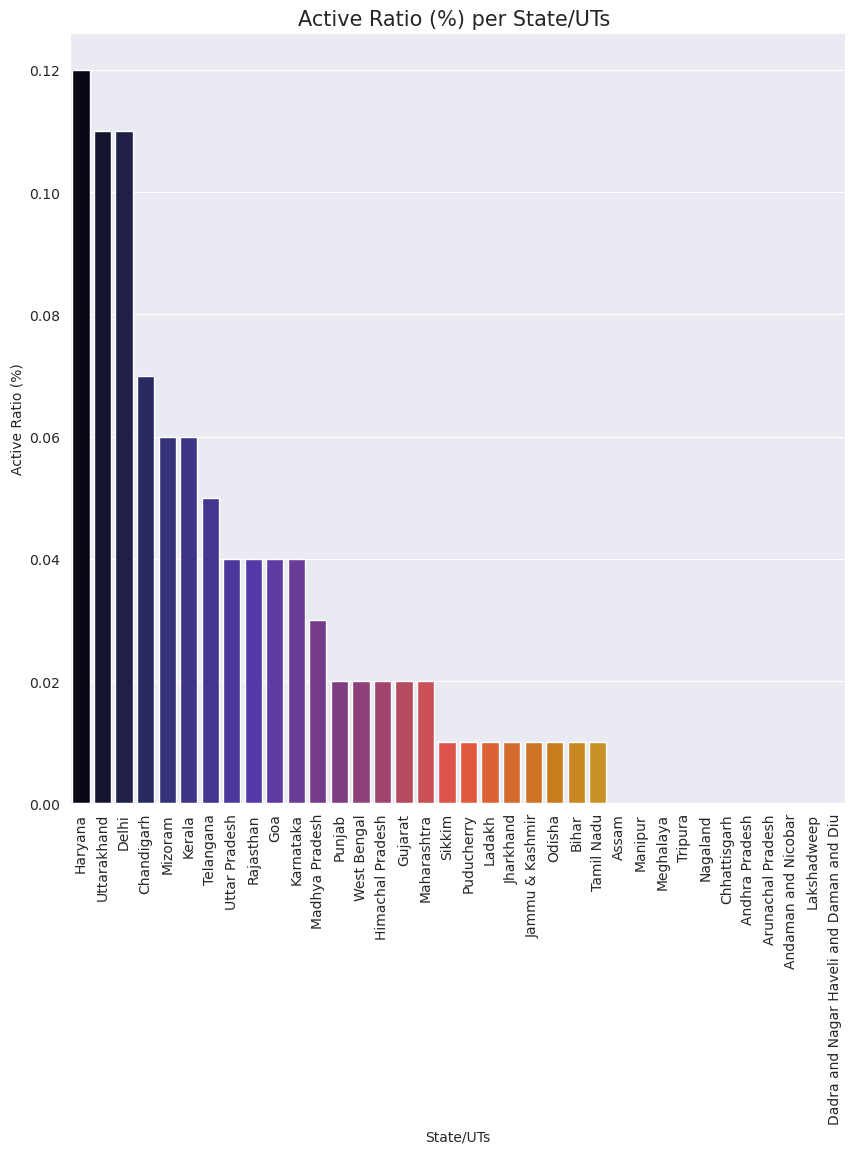

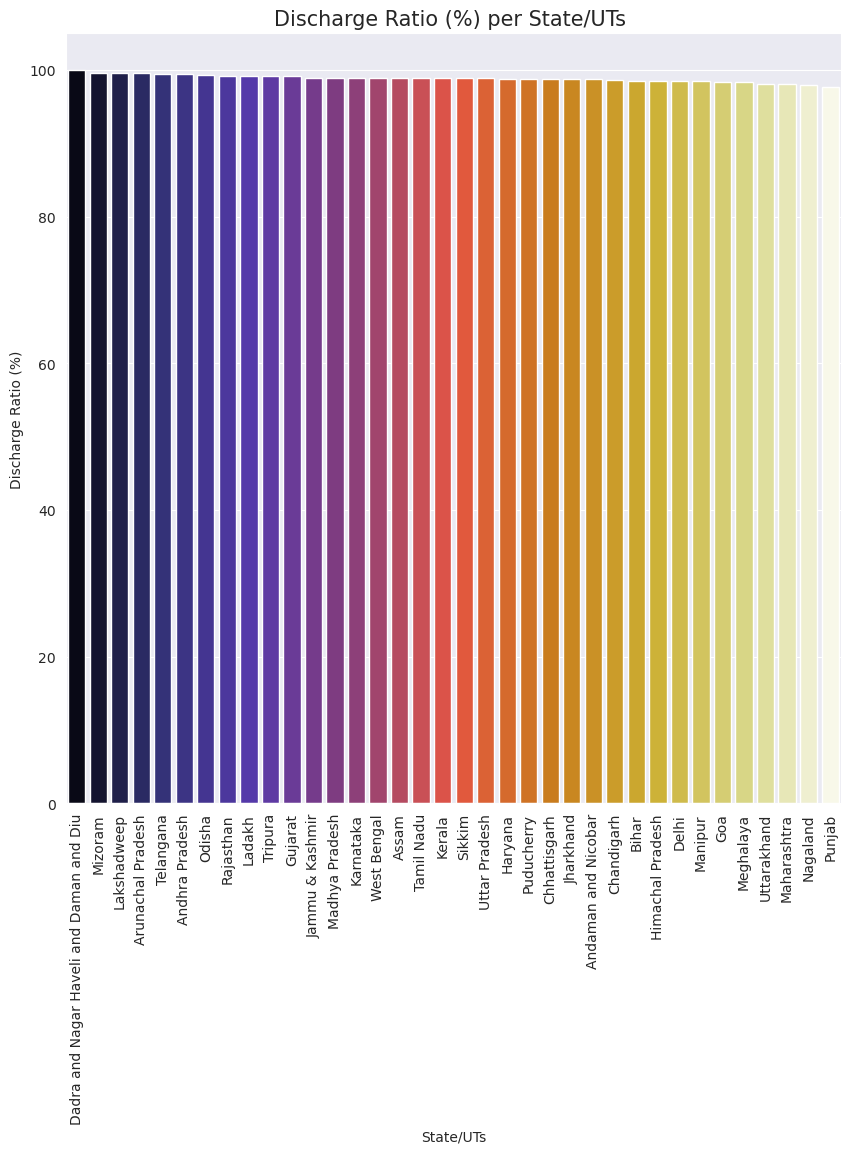

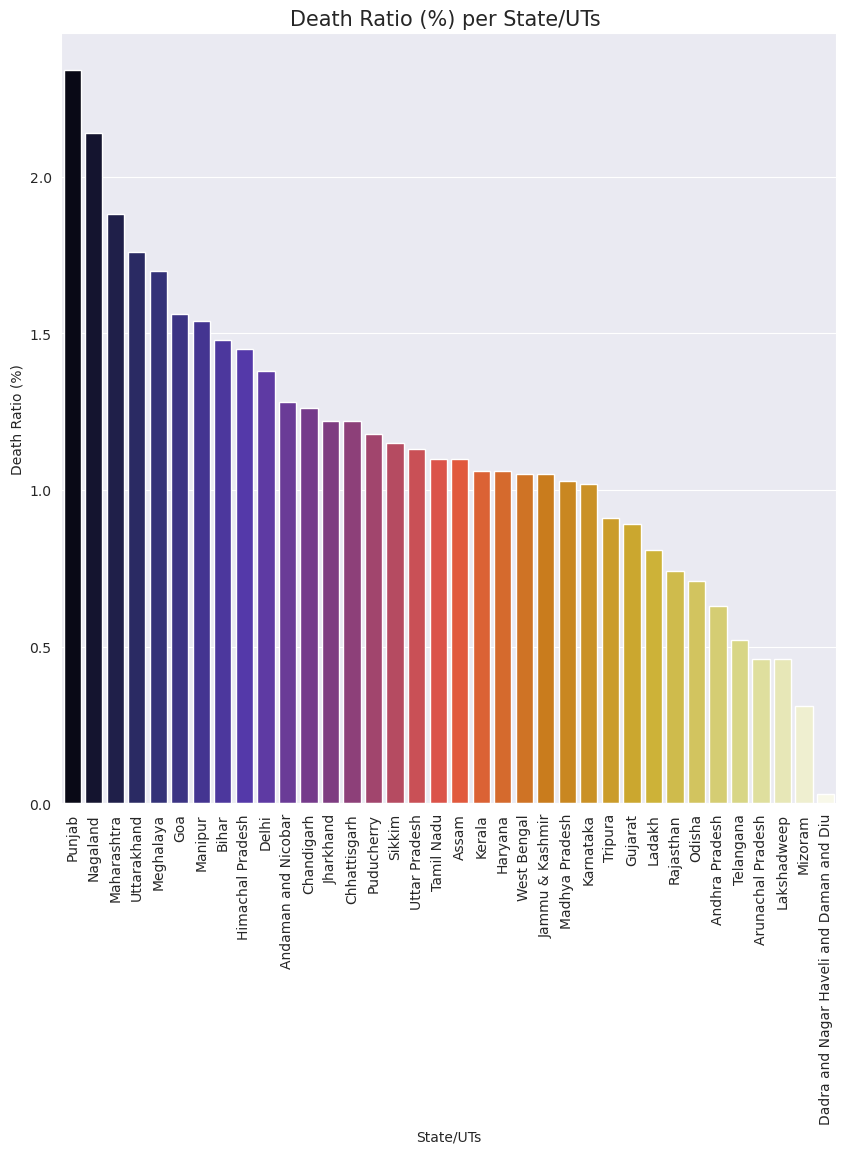

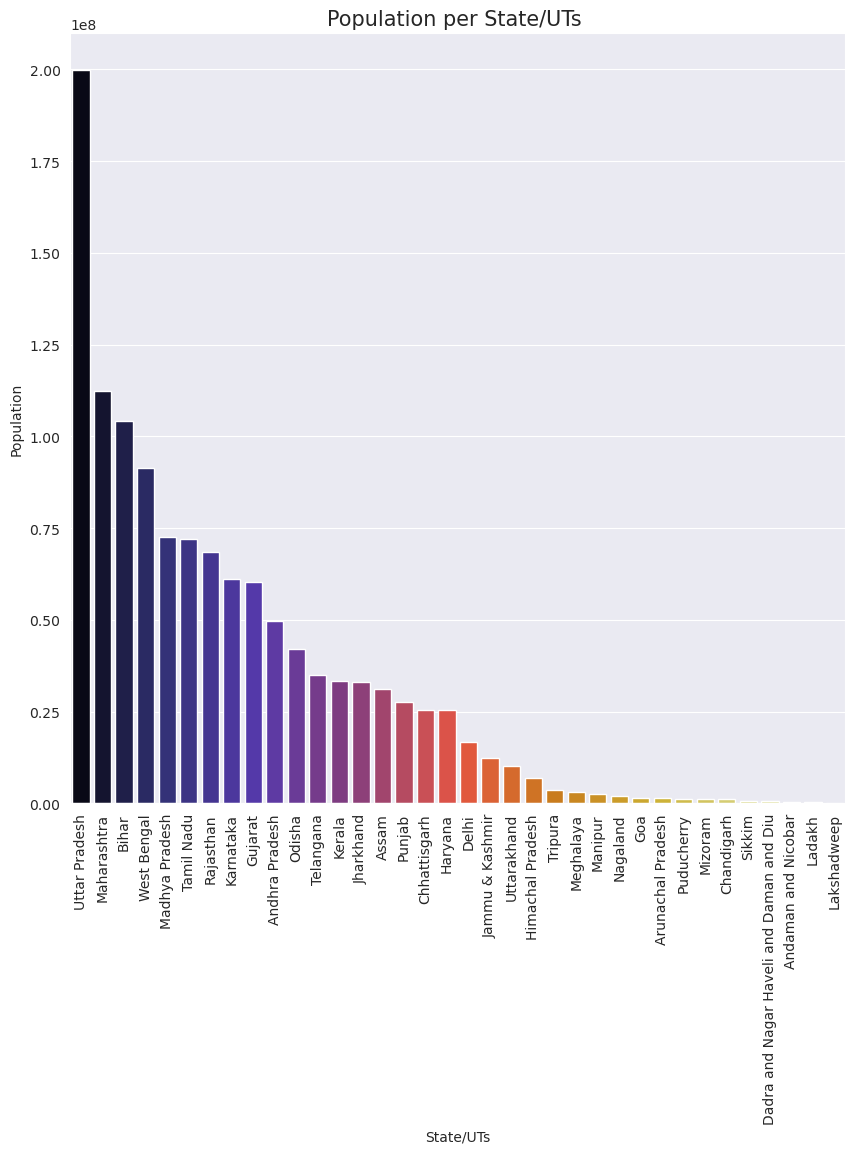

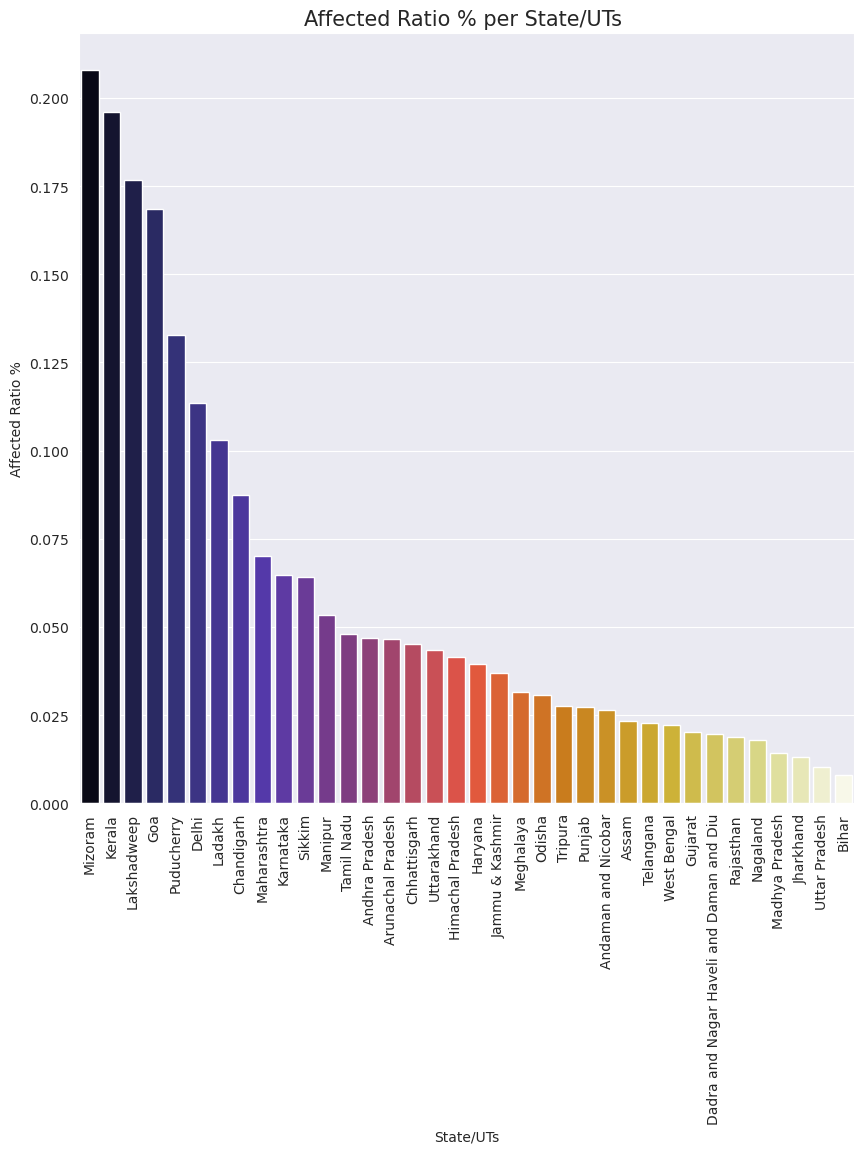

In [16]:
for attribute in attributes:
    data=data.sort_values(attribute,ascending=False)
    plt.figure(figsize=(10,10))
    sns.barplot(x='State/UTs',y=attribute,palette='CMRmap',data=data)
    plt.title(attribute+" per State/UTs ",fontsize=15)
    plt.xticks(rotation=90)
    plt.show();

<p style="background-color:#7ff2f3;">
    <b>
        Conclusion:
    </b>
    Maharashtra has the highest number of total cases and Andman and Nicobar are at the
    last place. Kerala has the highest number of active cases. Number of discharged people
    is large in Maharashtra but number of deaths are large as well that is because of the
    large and dense population in the different cities of Maharashtra. Haryana has the
    highest active case ratio and Punjab has the highest death ratio but the discharge
    ratio is almost same for each and every state / union territory.The last plot
    gives population of each state /  union territory. Mizoram tops the list of % of
    population infected with Covid-19 (slightly more than 2% of the population) while
    Kerala is at the second place (nearly 2%).
</p>

#### One can make this plot more interesting by comparing the attributes of states / union territories on the map of India.

In [17]:
for attribute in attributes:
    fig=px.choropleth(data,
             geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
             featureidkey='properties.ST_NM',   
             locations='State/UTs',       
              color=attribute,
              color_continuous_scale='Inferno',
               title=attribute+' per State / UTs' ,  
               height=700
              )
    fig.update_geos(fitbounds="locations", visible=False)
    fig.show()
#                                                                                               Scroll Down From Here >>>>>>>

<p style="background-color:#7ff2f3;">
    The above plots show same comparitive relationship between states/UTs and the
    attributes like the barplots, but with the map we can easily understand how the virus
    might have spread across the contry. The limitation of this plot is due smaller size
    union territories are not easily visible.
</p>

#### Getting the total number of cases,number of active cases , number deaths and discharges across the nation

In [18]:
data[['Total Cases','Active','Discharged','Deaths']].sum(axis=0)

Total Cases    43136371
Active            14955
Discharged     42597003
Deaths           524413
dtype: int64

The End